

```
# 此內容會顯示為程式碼
```
Making Baseline model

In [1]:

# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the data
from google.colab import files
uploaded=files.upload()
temperature=pd.read_csv("Temperature.csv",parse_dates= {"date" : ["year","month","day"]},
                keep_date_col=True)
#convert the temperature from object to int 64/float
temperature.max_temp = pd.to_numeric(temperature.max_temp, errors='coerce')
temperature.min_temp = pd.to_numeric(temperature.min_temp, errors='coerce')
temperature.mean_temp = pd.to_numeric(temperature.mean_temp, errors='coerce')

#remove the row which has NaN value
temperature=temperature.dropna()
print(temperature)

# Check the shape of the dataset
print(temperature.shape)

# Select the datetime and the temperature columns
temp_max_df = temperature[["date","max_temp"]]
temp_min_df = temperature[["date","min_temp"]]
temp_mean_df = temperature[["date","mean_temp"]]

temp_mean_df.head(10)

Saving Temperature.csv to Temperature.csv
           date  year month day  max_temp  min_temp  mean_temp
0    2007-01-01  2007     1   1      24.4      15.0       18.9
1    2007-01-02  2007     1   2      21.3      17.1       19.0
2    2007-01-03  2007     1   3      22.1      17.9       19.4
3    2007-01-04  2007     1   4      20.8      14.8       16.8
4    2007-01-05  2007     1   5      19.8      11.8       15.5
...         ...   ...   ...  ..       ...       ...        ...
5747 2022-09-26  2022     9  26      33.2      25.3       28.7
5748 2022-09-27  2022     9  27      32.1      27.2       29.3
5749 2022-09-28  2022     9  28      32.0      27.6       29.3
5750 2022-09-29  2022     9  29      29.7      24.0       27.8
5751 2022-09-30  2022     9  30      28.3      24.3       25.6

[5736 rows x 7 columns]
(5736, 7)


,date,mean_temp
0,2007-01-01,18.9
1,2007-01-02,19.0
2,2007-01-03,19.4
3,2007-01-04,16.8
4,2007-01-05,15.5
5,2007-01-06,14.0
6,2007-01-07,13.4
7,2007-01-08,13.1
8,2007-01-09,13.4
9,2007-01-10,15.9


In [3]:
temp_min_df.head(10)

,date,min_temp
0,2007-01-01,15.0
1,2007-01-02,17.1
2,2007-01-03,17.9
3,2007-01-04,14.8
4,2007-01-05,11.8
5,2007-01-06,11.1
6,2007-01-07,10.6
7,2007-01-08,9.5
8,2007-01-09,9.7
9,2007-01-10,11.3


In [4]:
temp_max_df.head(10)

,date,max_temp
0,2007-01-01,24.4
1,2007-01-02,21.3
2,2007-01-03,22.1
3,2007-01-04,20.8
4,2007-01-05,19.8
5,2007-01-06,18.1
6,2007-01-07,17.9
7,2007-01-08,18.7
8,2007-01-09,19.1
9,2007-01-10,20.0


In [5]:
# Check the shape of the dataset
temp_max_df.shape
temp_min_df.shape
temp_mean_df.shape

(5736, 2)

In [8]:
# Select the subset data from 2010 to 2022
mask = (temp_max_df['date'] >= '2016-01-01') & (temp_max_df['date'] <= '2022-09-30')
temp_max_df = temp_max_df.loc[mask]

# Reset the index 
temp_max_df.set_index("date", inplace=True)

# Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(temp_max_df.head(5))
display(temp_max_df.tail(5))

,max_temp
date,
2016-01-01,22.0
2016-01-02,22.3
2016-01-03,20.1
2016-01-04,23.9
2016-01-05,22.0


,max_temp
date,
2022-09-26,33.2
2022-09-27,32.1
2022-09-28,32.0
2022-09-29,29.7
2022-09-30,28.3


In [10]:
# Select the subset data from 2010 to 2022
mask = (temp_min_df['date'] >= '2016-01-01') & (temp_min_df['date'] <= '2022-09-30')
temp_min_df = temp_min_df.loc[mask]

# Reset the index 
temp_min_df.set_index("date", inplace=True)

# Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(temp_min_df.head(5))
display(temp_min_df.tail(5))

,min_temp
date,
2016-01-01,16.0
2016-01-02,15.4
2016-01-03,18.0
2016-01-04,19.1
2016-01-05,19.4


,min_temp
date,
2022-09-26,25.3
2022-09-27,27.2
2022-09-28,27.6
2022-09-29,24.0
2022-09-30,24.3


In [11]:
# Select the subset data from 2010 to 2022
mask = (temp_mean_df['date'] >= '2016-01-01') & (temp_mean_df['date'] <= '2022-09-30')
temp_mean_df = temp_mean_df.loc[mask]

# Reset the index 
temp_mean_df.set_index("date", inplace=True)

# Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(temp_mean_df.head(5))
display(temp_mean_df.tail(5))

,mean_temp
date,
2016-01-01,18.4
2016-01-02,18.8
2016-01-03,19.2
2016-01-04,21.1
2016-01-05,21.0


,mean_temp
date,
2022-09-26,28.7
2022-09-27,29.3
2022-09-28,29.3
2022-09-29,27.8
2022-09-30,25.6


In [12]:
temp_max_df.describe()

,max_temp
count,2457.000000
mean,27.247253
std,5.264231
min,6.800000
25%,23.600000
50%,28.100000
75%,31.800000
max,37.400000


In [13]:
temp_min_df.describe()

,min_temp
count,2457.000000
mean,21.405820
std,5.230899
min,2.300000
25%,17.400000
50%,22.600000
75%,25.800000
max,29.800000


In [14]:
temp_mean_df.describe()

,mean_temp
count,2457.000000
mean,23.896907
std,5.126702
min,4.100000
25%,20.000000
50%,24.900000
75%,28.400000
max,32.700000


In [15]:
# Output the maximum and minimum temperature date
print(temp_max_df.loc[temp_max_df["max_temp"] == temp_max_df["max_temp"].max()])
print(temp_min_df.loc[temp_min_df["min_temp"] == temp_min_df["min_temp"].min()])

            max_temp
date                
2017-08-22      37.4
            min_temp
date                
2016-01-24       2.3


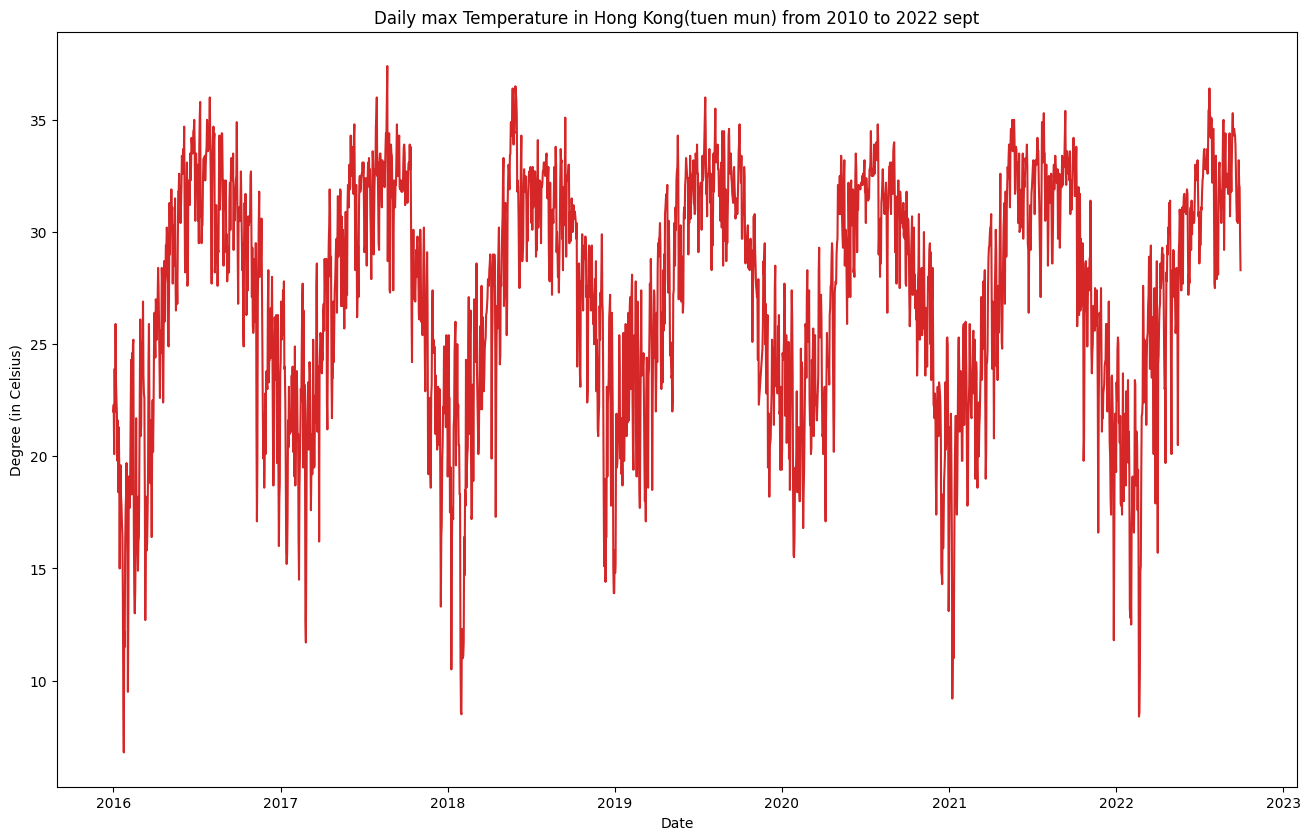

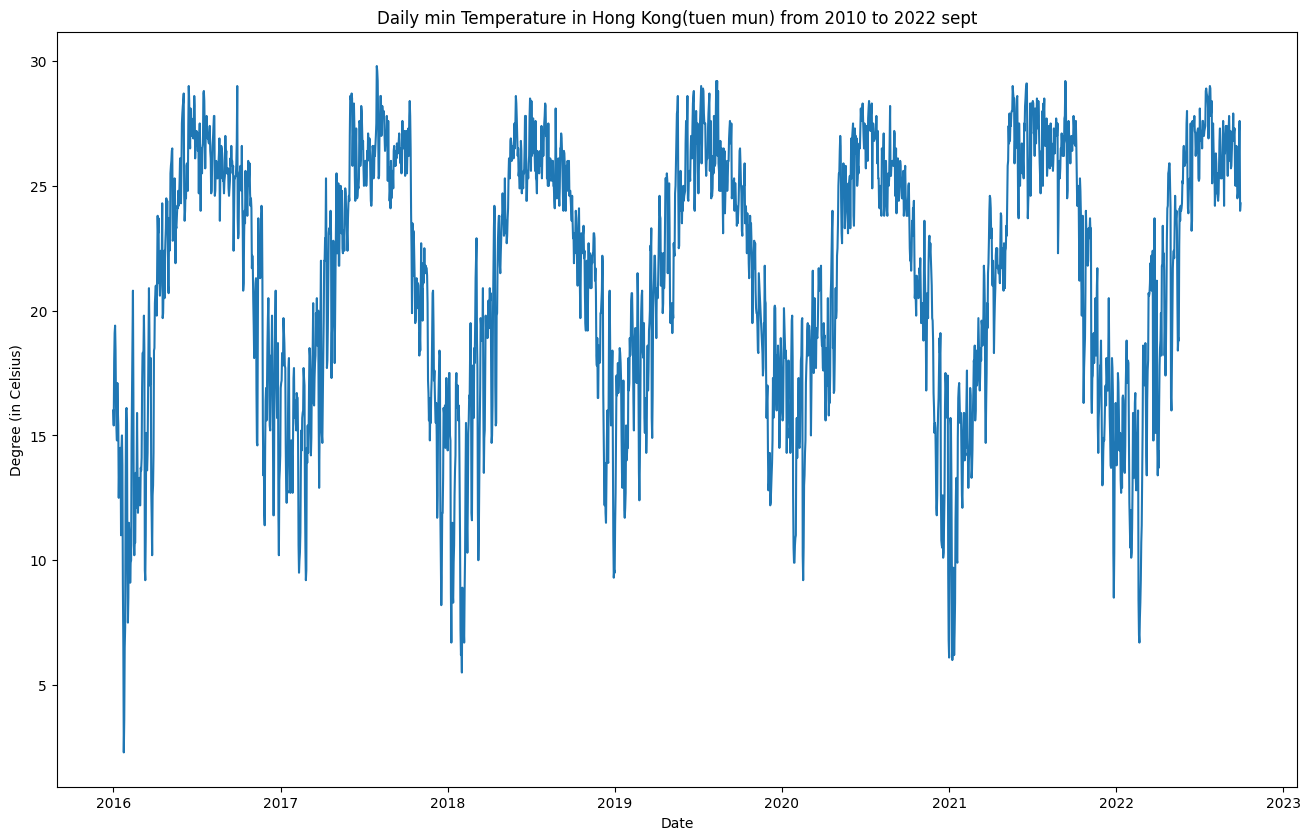

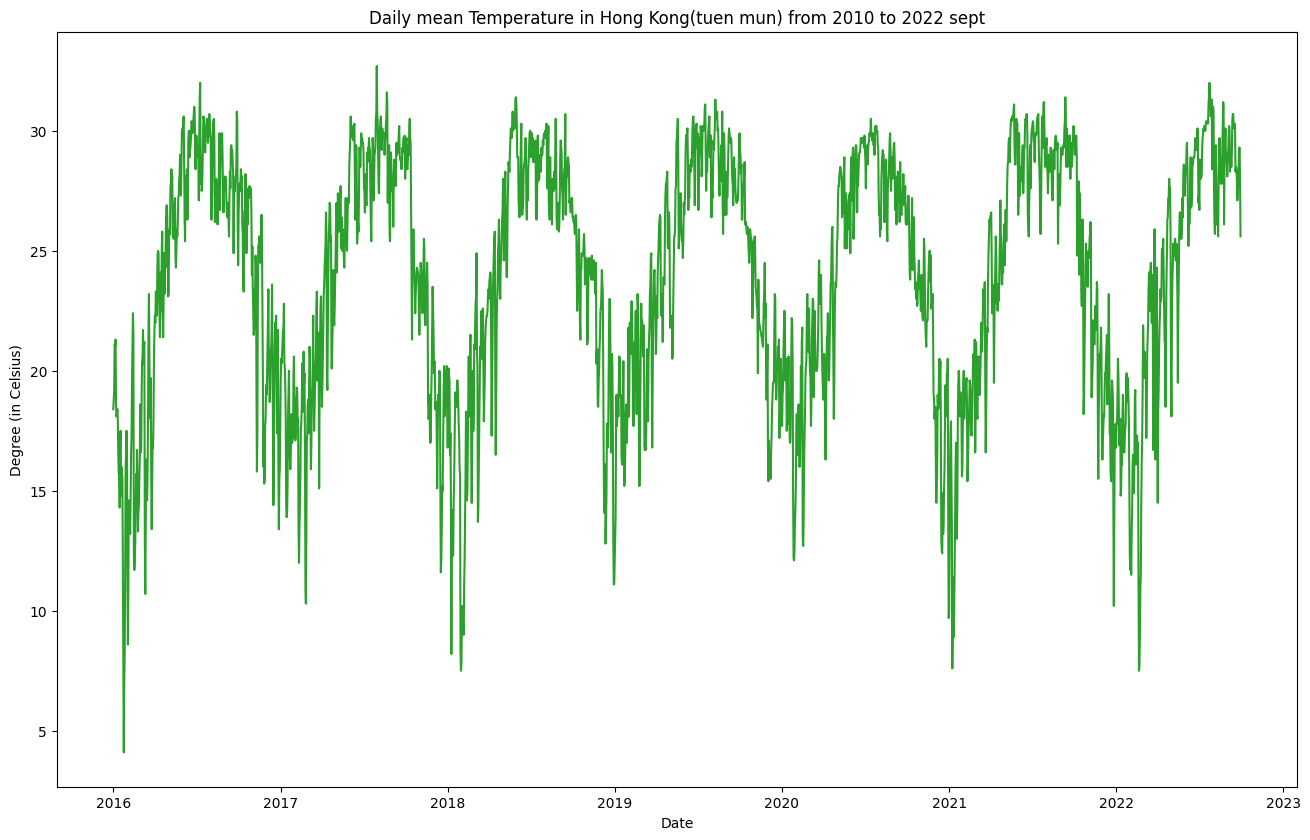

In [17]:
# Plot the daily max temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_max_df.index, temp_max_df.max_temp, color='tab:red')
plt.gca().set(title="Daily max Temperature in Hong Kong(tuen mun) from 2010 to 2022 sept", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

# Plot the daily min temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_min_df.index, temp_min_df.min_temp, color='tab:blue')
plt.gca().set(title="Daily min Temperature in Hong Kong(tuen mun) from 2010 to 2022 sept", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

# Plot the daily mean temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_mean_df.index, temp_mean_df.mean_temp, color='tab:green')
plt.gca().set(title="Daily mean Temperature in Hong Kong(tuen mun) from 2010 to 2022 sept", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

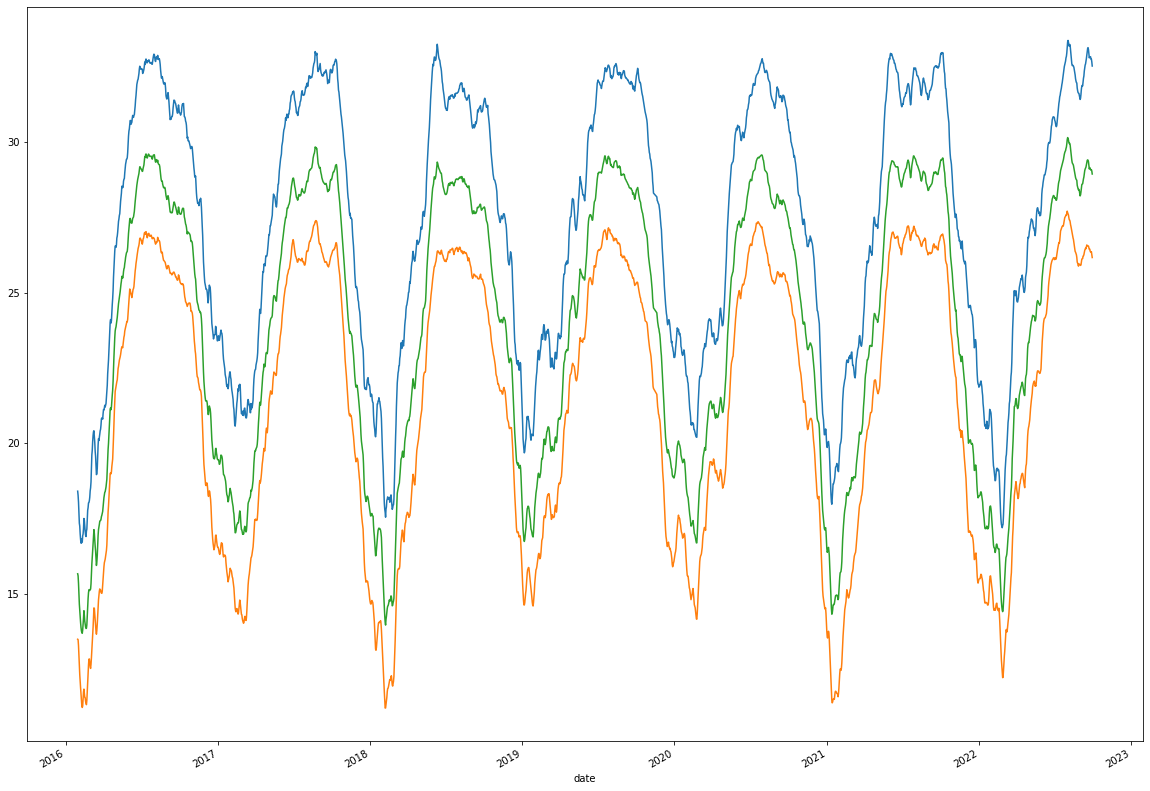

In [20]:
# Apply the Moving Average function by a subset of size 30 days.
temp_max_df_mean = temp_max_df.max_temp.rolling(window=30).mean()
temp_max_df_mean.plot(figsize=(20,15))
# Apply the Moving Average function by a subset of size 30 days.
temp_min_df_mean = temp_min_df.min_temp.rolling(window=30).mean()
temp_min_df_mean.plot(figsize=(20,15))
# Apply the Moving Average function by a subset of size 30 days.
temp_mean_df_mean = temp_mean_df.mean_temp.rolling(window=30).mean()
temp_mean_df_mean.plot(figsize=(20,15))

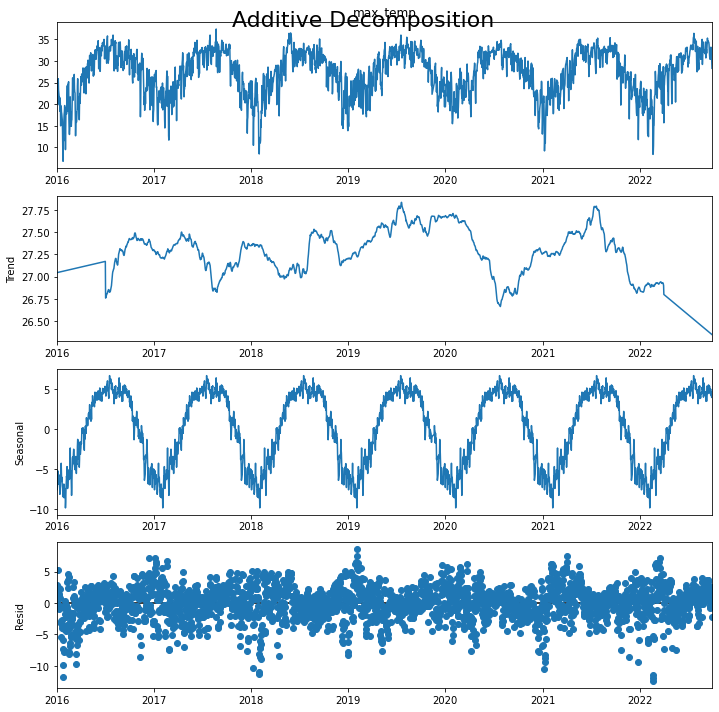

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(temp_max_df.max_temp, model='additive', extrapolate_trend='freq', freq=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()


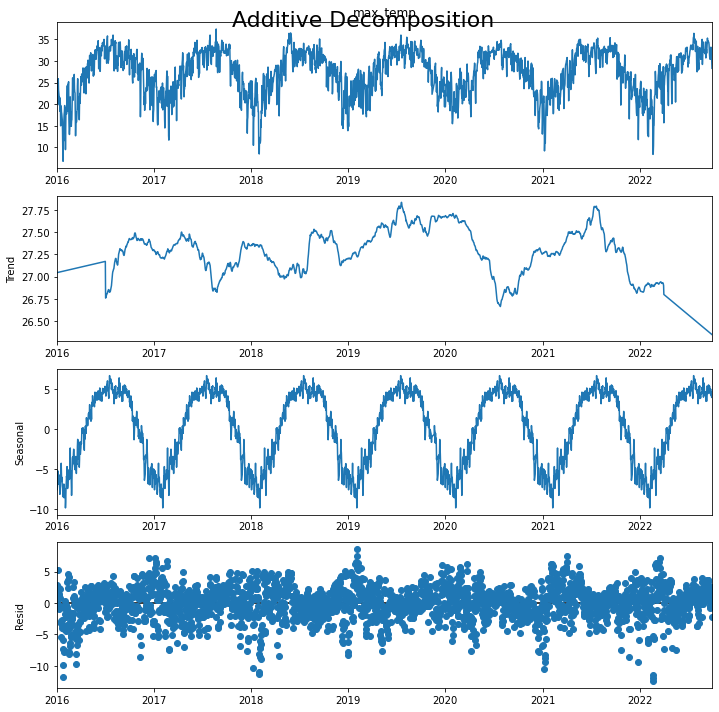

In [22]:
# Additive Decomposition
result_add1 = seasonal_decompose(temp_min_df.min_temp, model='additive', extrapolate_trend='freq', freq=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()


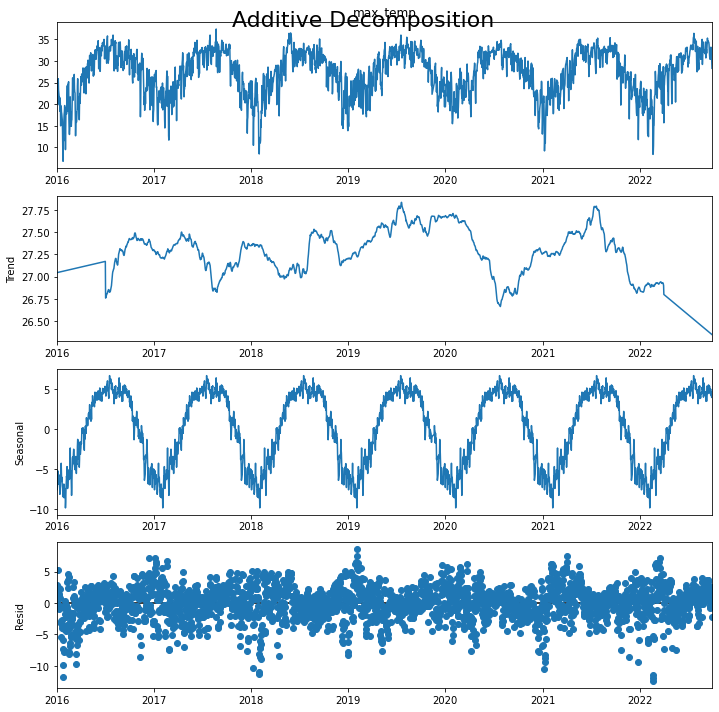

In [23]:
# Additive Decomposition
result_add2 = seasonal_decompose(temp_mean_df.mean_temp, model='additive', extrapolate_trend='freq', freq=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()


In [47]:
# Shift the current temperature to the next day. 
predicted_max_df = temp_max_df["max_temp"].to_frame().shift(1).rename(columns = {"max_temp": "max_temp_pred" })
actual_max_df = temp_max_df["max_temp"].to_frame().rename(columns = {"max_temp": "max_temp_actual" })

# Concatenate the actual and predicted temperature
one_step_max_df = pd.concat([actual_max_df,predicted_max_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_max_df = one_step_max_df[1:]
one_step_max_df.head(10)

,max_temp_actual,max_temp_pred
date,,
2016-01-02,22.3,22.0
2016-01-03,20.1,22.3
2016-01-04,23.9,20.1
2016-01-05,22.0,23.9
2016-01-06,25.9,22.0
2016-01-07,23.3,25.9
2016-01-08,22.5,23.3
2016-01-09,21.9,22.5
2016-01-10,19.8,21.9


In [44]:
# Shift the current temperature to the next day. 
predicted_min_df = temp_min_df["min_temp"].to_frame().shift(1).rename(columns = {"min_temp": "min_temp_pred" })
actual_min_df = temp_min_df["min_temp"].to_frame().rename(columns = {"min_temp": "min_temp_actual" })

# Concatenate the actual and predicted temperature
one_step_min_df = pd.concat([actual_min_df,predicted_min_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_min_df = one_step_min_df[1:]
one_step_min_df.head(10)

,min_temp_actual,min_temp_pred
date,,
2016-01-02,15.4,16.0
2016-01-03,18.0,15.4
2016-01-04,19.1,18.0
2016-01-05,19.4,19.1
2016-01-06,18.4,19.4
2016-01-07,16.2,18.4
2016-01-08,15.3,16.2
2016-01-09,14.8,15.3
2016-01-10,17.1,14.8


In [51]:
# Shift the current temperature to the next day. 
predicted_mean_df = temp_mean_df["mean_temp"].to_frame().shift(1).rename(columns = {"mean_temp": "mean_temp_pred" })
actual_mean_df = temp_mean_df["mean_temp"].to_frame().rename(columns = {"mean_temp": "mean_temp_actual" })

# Concatenate the actual and predicted temperature
one_step_mean_df = pd.concat([actual_mean_df,predicted_mean_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_mean_df = one_step_mean_df[1:]
one_step_mean_df.head(10)

,mean_temp_actual,mean_temp_pred
date,,
2016-01-02,18.8,18.4
2016-01-03,19.2,18.8
2016-01-04,21.1,19.2
2016-01-05,21.0,21.1
2016-01-06,21.3,21.0
2016-01-07,18.6,21.3
2016-01-08,18.1,18.6
2016-01-09,18.2,18.1
2016-01-10,18.4,18.2


In [52]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_max_pred_err = MSE(one_step_max_df.max_temp_actual, one_step_max_df.max_temp_pred, squared=False)
print("The max temp RMSE is",temp_max_pred_err)
# Calculate the RMSE
temp_min_pred_err = MSE(one_step_min_df.min_temp_actual, one_step_min_df.min_temp_pred, squared=False)
print("The max temp RMSE is",temp_min_pred_err)
# Calculate the RMSE
temp_mean_pred_err = MSE(one_step_mean_df.mean_temp_actual, one_step_mean_df.mean_temp_pred, squared=False)
print("The max temp RMSE is",temp_mean_pred_err)

The max temp RMSE is 2.2960196048942247
The max temp RMSE is 1.5743529253475819
The max temp RMSE is 1.5297803806525028


In [53]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_max_df.max_temp_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [56]:
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_max_df.max_temp_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


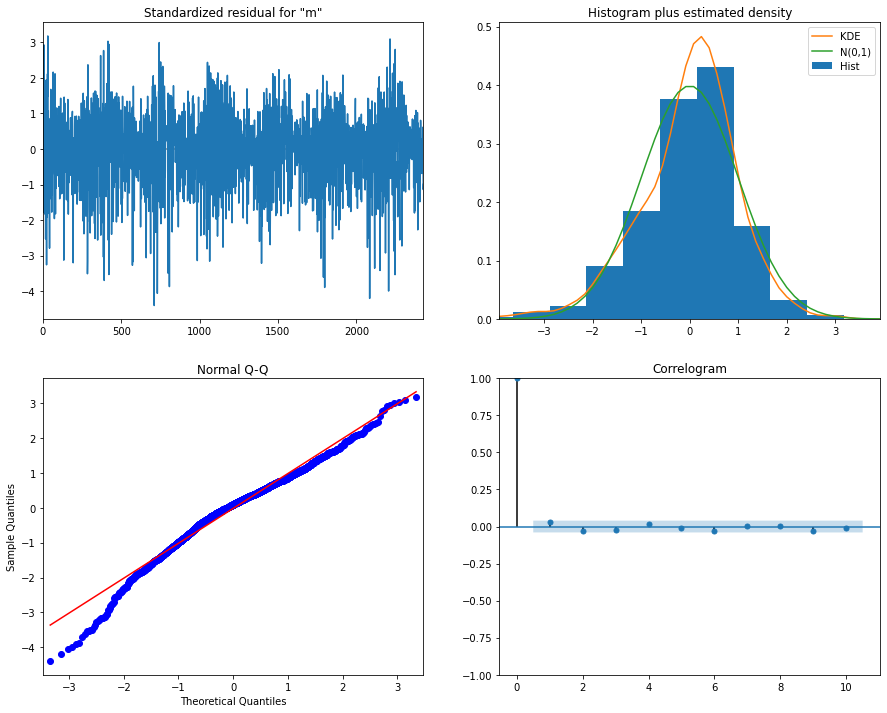

In [57]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [59]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

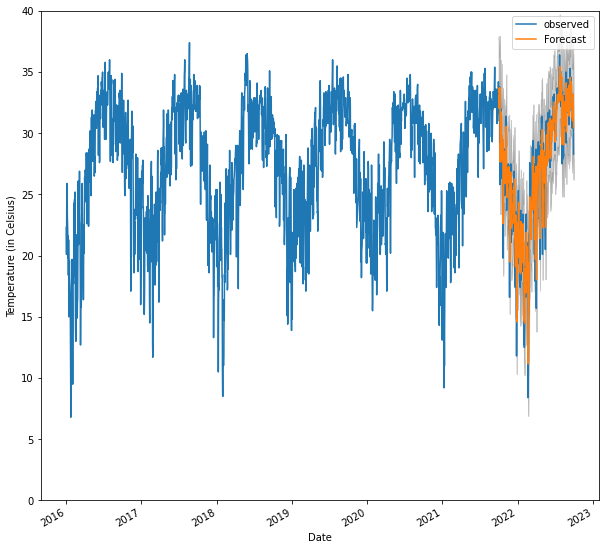

In [62]:
ax = one_step_max_df.max_temp_actual['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([0,40])
plt.legend()
plt.show()